In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
visa_df= pd.read_csv(r"C:\Users\dasar\Documents\Data Science\Naresh IT\Data sets\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box Plot**

- box plot is used to detect outliers
- box plot has min q1 q2 q3 and max value
- inside box plot red line represents median which is 50 percentile data

**Outliers**
  
- very very huge observation
- very very small observation
- which pull the data in any side of the distribution
- mild outliers
    - q1-1.5*IQR
- Strong outliers
    - q1-3*IQR and q1+3*IQR
- IQR: Inter Quartile range
    - IQR=Q3-Q1
- Q1: 25p
- Q1: 50p
- Q3: 75p


In [4]:
columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']  # Replace with actual column names
stats_data=[]
# Compute statistics for each column
for col in columns:
    count = len(visa_df[col])
    min_val = round(visa_df[col].min(), 2)
    max_val = round(visa_df[col].max(), 2)
    mean_val = round(visa_df[col].mean(), 2)
    median_val = round(visa_df[col].median(), 2)
    std_val = round(visa_df[col].std(), 2)
    _25p_val = round(np.percentile(visa_df[col], 25), 2)
    _50p_val = round(np.percentile(visa_df[col], 50), 2)  # Equivalent to median
    _75p_val = round(np.percentile(visa_df[col], 75), 2)
    
    stats_data.append([count, min_val, max_val, mean_val, median_val, std_val, _25p_val, _50p_val, _75p_val])

# Index for the statistics
index = ['Count', 'Min', 'Max', 'Mean', 'Median', 'Std', '25%', '50%', '75%']

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame(stats_data, columns=index, index=columns).T

print(stats_df)

        no_of_employees  yr_of_estab  prevailing_wage
Count          25480.00     25480.00         25480.00
Min              -26.00      1800.00             2.14
Max           602069.00      2016.00        319210.27
Mean            5667.04      1979.41         74455.81
Median          2109.00      1997.00         70308.21
Std            22877.93        42.37         52815.94
25%             1022.00      1976.00         34015.48
50%             2109.00      1997.00         70308.21
75%             3504.00      2005.00        107735.51


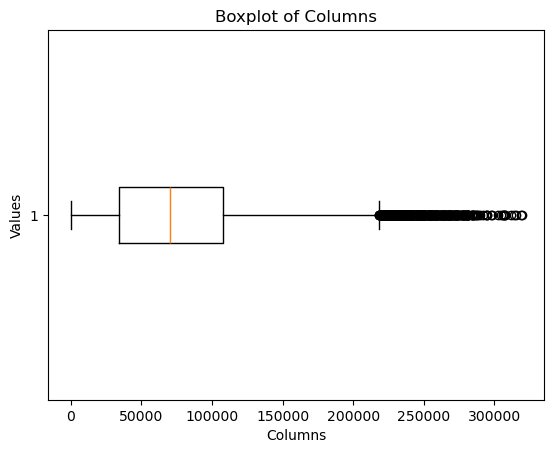

In [5]:
plt.boxplot(visa_df["prevailing_wage"], vert=False)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of Columns')
plt.show()

<Axes: >

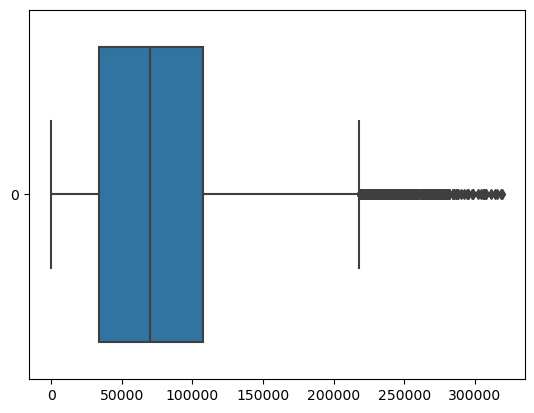

In [11]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')

{'whiskers': [<matplotlib.lines.Line2D at 0x24fa0ded110>,
 'caps': [<matplotlib.lines.Line2D at 0x24fa0dec590>,
 'boxes': [<matplotlib.lines.Line2D at 0x24fa0e02190>],
 'medians': [<matplotlib.lines.Line2D at 0x24fa0e0aed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24fa0e096d0>],
 'means': []}

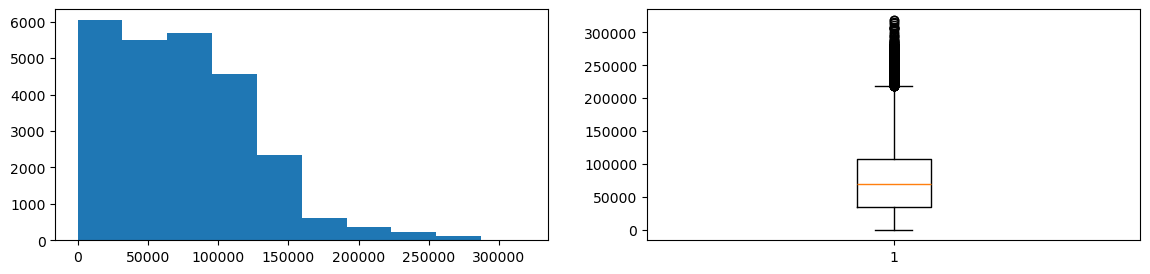

In [15]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])

** Finding the outliers **
- Outliers are available less than q1-1.5*IQR
- Outliers are available greater than q3+1.5*IQR
- Step1:
    - calculate Q1
    - calculate Q3
    - calculate IQR: Q3-Q1
- Step-2
    - LB = q1-1.5*IQR
    - UB = q1+1.5*IQR
- Step -3
    - con1= visa_df['prevailing_wage']<LB
    - con2= visa_df['prevailing_wage']>UB
    - apply OR operator and get the outliers data

In [7]:
Q1=round(np.percentile(visa_df['prevailing_wage'], 25), 2)
Q3=round(np.percentile(visa_df['prevailing_wage'], 75), 2)
IQR=Q3-Q1
LB= Q1-(1.5*IQR)
UB= Q3+(1.5*IQR)
con1=(visa_df['prevailing_wage']<LB)
con2=(visa_df['prevailing_wage']>UB)
Outliers_data=visa_df[con1 | con2]
len(Outliers_data)

427

In [12]:
Q1=round(np.percentile(visa_df['prevailing_wage'], 25), 2)
Q3=round(np.percentile(visa_df['prevailing_wage'], 75), 2)
IQR=Q3-Q1
LB= Q1-1.5*IQR
UB= Q3+1.5*IQR
non_Outliers_data=visa_df[(visa_df['prevailing_wage']>LB) & (visa_df['prevailing_wage']<UB)]
non_Outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


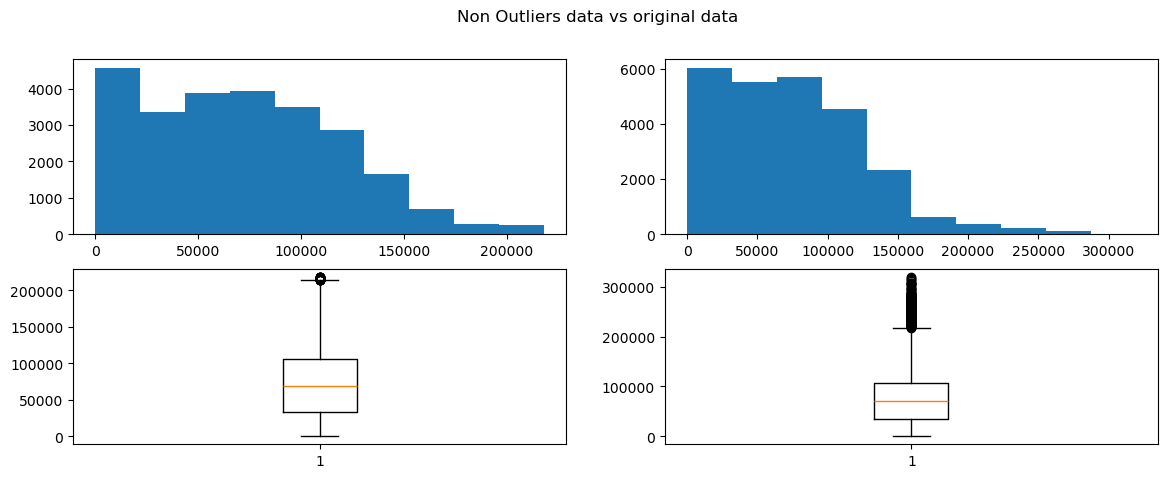

In [13]:
plt.figure(figsize=(14,5))

plt.suptitle('Non Outliers data vs original data')
plt.subplot(2,2,1).hist(non_Outliers_data['prevailing_wage'])
plt.subplot(2,2,3).boxplot(non_Outliers_data['prevailing_wage'])


plt.subplot(2,2,2).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])
plt.show()

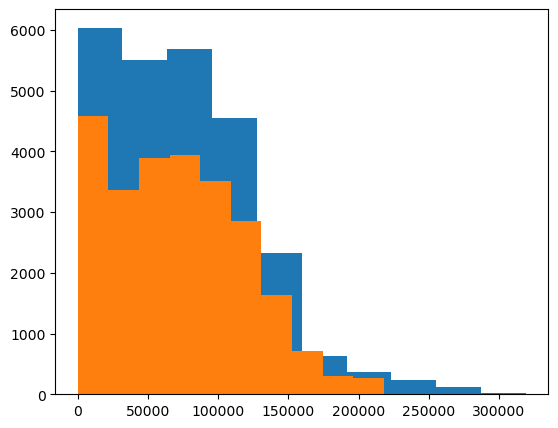

In [14]:
#Comparison
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_Outliers_data['prevailing_wage'])
plt.show()

**How to deal with outliers**
**Drop the Outliers**
- Dropping is not considered
- When dropped , data will be lost
- For example here we are dropping 2173 rows
- x% of 25480-2173
- it is some percent data

**Method-2: Fill with median value**
- we already know that outliers does not affect the median
- So we can fill outliers by median

**Method-3: Cap the values with Q1 and Q3**
- all less than lower bound values, we can replace with Q1 or LB
- all Greater than upper bound values, we can replace with Q3 or UB
    

**Fill with median**
- Create empty list
- iterate the visa_df['prevailing_wage'].values
- if each value <LB or >UB then append with median value
- else append with i value

       prevailing_wage  modified_wage
0             592.2029       592.2029
1           83425.6500     83425.6500
2          122996.8600    122996.8600
3           83434.0300     83434.0300
4          149907.3900     70308.2100
...                ...            ...
25475       77092.5700     77092.5700
25476      279174.7900     70308.2100
25477      146298.8500     70308.2100
25478       86154.7700     86154.7700
25479       70876.9100     70876.9100

[25480 rows x 2 columns]


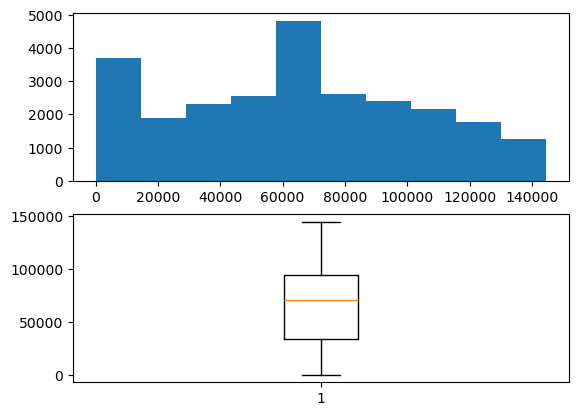

In [15]:
Q1=round(np.percentile(visa_df['prevailing_wage'], 25), 2)
Q3=round(np.percentile(visa_df['prevailing_wage'], 75), 2)
IQR=Q3-Q1
LB= Q1-1.5*IQR
UB= Q1+1.5*IQR
median_wage = round(np.median(visa_df['prevailing_wage']), 2)

# Create an empty list to store the modified values
modified_wages = []

# Iterate through the prevailing_wage values and replace outliers with the median
for wage in visa_df['prevailing_wage'].values:
    if wage < LB or wage > UB:
        modified_wages.append(median_wage)
    else:
        modified_wages.append(wage)

# Create a new column in the DataFrame to store the modified wages
visa_df['modified_wage'] = modified_wages

# Print the DataFrame to check the results
print(visa_df[['prevailing_wage', 'modified_wage']])
plt.subplot(2,1,1).hist(visa_df['modified_wage'])
plt.subplot(2,1,2).boxplot(visa_df['modified_wage'])
plt.show()

In [ ]:
**np.where**
- np.where will use for binary condition
- it has 3 arguments
    - condition
    - value if condition is True


In [37]:
d={"sub":["DS","ML","CS"],"Marks":[100,150,20]}
data=pd.DataFrame(d)
data

,sub,Marks
0,DS,100
1,ML,150
2,CS,20


In [38]:
con = data['Marks']>100
l=np.where(con,1,data)

ValueError: operands could not be broadcast together with shapes (3,) () (3,2) 